#### Programmer: Dhruv Singh <br> Project: Deloitte Data Exercise <br> Phase: Pt. 2 Data Analysis <br> Date Updated: 1/24/2022

### Part 2: Data Analysis

In [1]:
# libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading in Data

In [2]:
df = pd.read_csv('2_data/df_cleaned.csv')

#### Summary Statistics

In [3]:
df.columns

Index(['Gender_Position', 'Division', 'Div_Totals', 'Bib_Num', 'Name', 'Age',
       'Age_Cat', 'Gender', 'Hometown', 'Gun_Time', 'Gun_Time_minutes',
       'Net_Time', 'Net_Time_minutes', 'Pace', 'Pace_minutes', 'Age_flag'],
      dtype='object')

In [4]:
df.dtypes

Gender_Position       int64
Division              int64
Div_Totals            int64
Bib_Num               int64
Name                 object
Age                 float64
Age_Cat              object
Gender               object
Hometown             object
Gun_Time             object
Gun_Time_minutes    float64
Net_Time             object
Net_Time_minutes    float64
Pace                 object
Pace_minutes        float64
Age_flag              int64
dtype: object

In [5]:
df[['Age','Gun_Time_minutes','Net_Time_minutes','Pace_minutes']].describe().round(2)

,Age,Gun_Time_minutes,Net_Time_minutes,Pace_minutes
count,2370.00,2370.00,2370.00,2370.00
mean,39.04,57.94,55.09,8.87
std,11.56,11.42,10.28,1.66
min,9.00,28.80,28.78,4.63
25%,31.00,50.27,48.34,7.78
50%,39.00,57.69,54.38,8.76
75%,46.00,64.02,60.18,9.70
max,84.00,110.52,106.82,17.20


##### Q1. What are the mean, median, mode, and range of the race results for all racers by gender?

In [6]:
x1 = df[df.Gender=='M']['Net_Time_minutes']
x2 = df[df.Gender=='F']['Net_Time_minutes']

In [7]:
dict = {'Metric':['Mean', 'Median', 'Mode', 'Range'],
        'M':[x1.mean(), x1.median(), x1.mode(), max(x1)-min(x1)],
        'F':[x2.mean(), x2.median(), x2.mode(), max(x2)-min(x2)]
       }
  
df1 = pd.DataFrame(dict)

df1 = df1.round(2)

In [8]:
df1 = df1.round(2)
df1

,Metric,M,F
0,Mean,52.1326,58.4748
1,Median,51.38,57.85
2,Mode,0 35.47 1 47.08 2 47.38 3 49.80 4 ...,0 48.10 1 51.58 2 52.98 3 53.48 4 ...
3,Range,71.85,73.85


In [9]:
df1.dtypes

Metric    object
M         object
F         object
dtype: object

In [10]:
# writing out tables
with pd.ExcelWriter('3_output/tables/q1.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='q1')

##### Q1: Box Plot by Gender

<function matplotlib.pyplot.show(close=None, block=None)>

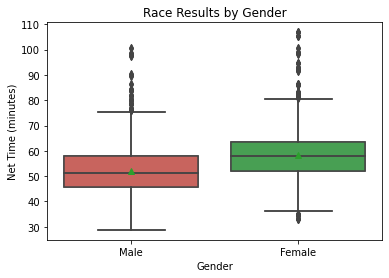

In [11]:
sns.boxplot(data=[x1, x2])

sns.boxplot(
    data=[x1, x2],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
    showmeans=True,
).set(
    title = 'Race Results by Gender',
    xlabel='Gender', 
    ylabel='Net Time (minutes)' 
)
plt.xticks([0, 1],['Male','Female'])
plt.savefig('3_output/graphs/q1.png', dpi=300, bbox_inches='tight')
plt.show

##### Q2. Analyze the difference between gun and net time race results.

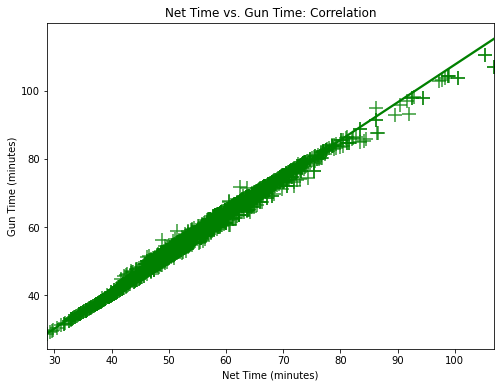

In [12]:
# creating a regression plot
plt.figure(figsize=(8,6))
# sns.set(font_scale=1.5)

ax = sns.regplot(x='Net_Time_minutes', y='Gun_Time_minutes', data=df, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Net Time (minutes)', ylabel='Gun Time (minutes)') # adding axes labels
ax.set_title('Net Time vs. Gun Time: Correlation') # add title
plt.savefig('3_output/graphs/q2_corr.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
df['Gun_Time_minutes'].corr(df['Net_Time_minutes'])

0.9948574532154756

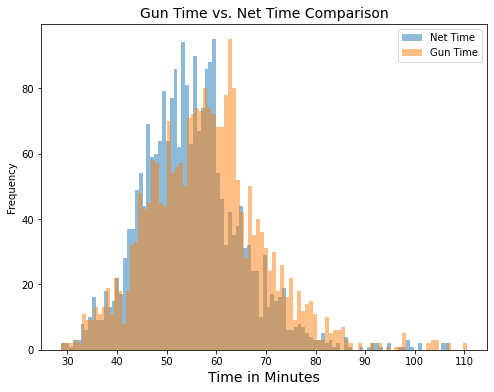

In [14]:
plt.figure(figsize=(8,6))

plt.hist(df['Net_Time_minutes'], bins=100, alpha=0.5, label="Net Time")
plt.hist(df['Gun_Time_minutes'], bins=100, alpha=0.5, label="Gun Time")

plt.xlabel("Time in Minutes", size=14)
plt.ylabel("Frequency", size=10)
plt.title("Gun Time vs. Net Time Comparison", size=14)
plt.legend(loc='upper right')
plt.savefig('3_output/graphs/q2.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# running t test
st.ttest_ind(df['Gun_Time_minutes'], df['Net_Time_minutes'], equal_var=True)

Ttest_indResult(statistic=9.033401753314017, pvalue=2.3754533971520994e-19)

##### Q3. How much time separates Chris Doe fromthe top 10 percentile of racers of the same division?

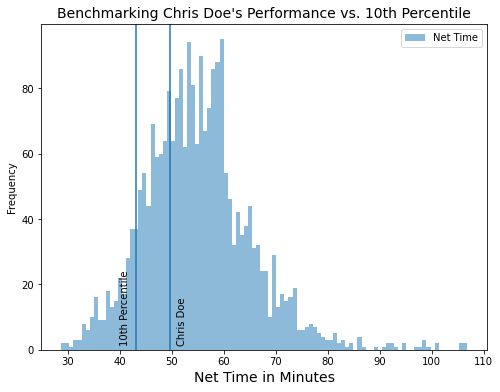

In [16]:
plt.figure(figsize=(8,6))

plt.hist(df['Net_Time_minutes'], bins = 100, alpha=0.5, label='Net Time')

plt.axvline(df.Net_Time_minutes.quantile(0.1))
plt.text(40,2,'10th Percentile',rotation=90, size = 10)

plt.axvline(49.72)
plt.text(51,2,'Chris Doe',rotation=90, size = 10)

plt.xlabel("Net Time in Minutes", size=14)
plt.ylabel("Frequency", size=10)
plt.title("Benchmarking Chris Doe's Performance vs. 10th Percentile", size=14)
plt.legend(loc='upper right')
plt.savefig('3_output/graphs/q3.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
df.Net_Time_minutes.quantile(0.1)

43.229

In [18]:
x = df[df['Name']=='Chris Doe']['Net_Time_minutes']
x

1743    49.72
Name: Net_Time_minutes, dtype: float64

In [19]:
time_diff = abs(df[df['Name']=='Chris Doe']['Net_Time_minutes'] - df.Net_Time_minutes.quantile(0.1))
time_diff

1743    6.491
Name: Net_Time_minutes, dtype: float64

##### Q4. Compare the race results of each division.

In [20]:
df.head()

,Gender_Position,Division,Div_Totals,Bib_Num,Name,Age,Age_Cat,Gender,Hometown,Gun_Time,Gun_Time_minutes,Net_Time,Net_Time_minutes,Pace,Pace_minutes,Age_flag
0,196,0,12,1399,Maddy Horan,14.0,0-14,F,Gaithersburg MD,00:51:16,51.27,00:49:59,49.98,00:8:03,8.05,0
1,298,0,12,3017,Mathilde Arandia,12.0,0-14,F,Mclean VA,00:53:04,53.07,00:52:59,52.98,00:8:32,8.53,0
2,252,0,12,1755,Hananh Lowell,13.0,0-14,F,Catlett VA,00:54:51,54.85,00:51:35,51.58,00:8:18,8.30,0
3,545,0,12,1923,Alexandra Miles,14.0,0-14,F,Clarksburg MD,1:01:28,61.47,00:57:38,57.63,00:9:17,9.28,0
4,527,0,12,2431,Deborah Sheperd,10.0,0-14,F,Hughesville MD,1:02:21,62.35,00:57:14,57.23,00:9:13,9.22,0


In [21]:
# using aggregate to groupby age and gender, and create division totals
df_agg1 = df[['Age_Cat', 'Gender', 'Net_Time_minutes']].groupby(['Age_Cat', 'Gender']).agg(['count'])
df_agg1 = df_agg1.reset_index(drop=False)
df_agg1.columns = df_agg1.columns.get_level_values(0)
df_agg1 = df_agg1.rename(columns = {"Net_Time_minutes": "Div_Totals"})

In [22]:
# reshaping long to wide
df_agg1 = df_agg1.pivot_table(index = ['Age_Cat'], columns = 'Gender', values = 'Div_Totals')
df_agg1

Gender,F,M
Age_Cat,,
0-14,12.0,26.0
15-19,27.0,45.0
20-29,230.0,144.0
30-39,421.0,349.0
40-49,283.0,415.0
50-59,105.0,206.0
60-69,24.0,69.0
70-79,3.0,9.0
80-89,NaN,2.0


In [23]:
# writing out tables
with pd.ExcelWriter('3_output/tables/q4_1.xlsx') as writer:  
    df_agg1.to_excel(writer, sheet_name='q4_1')

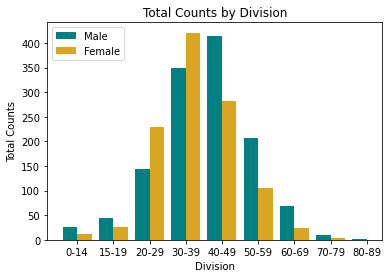

In [24]:
X = df_agg1.index.tolist()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, df_agg1['M'], 0.4, label = 'Male', color = 'teal')
plt.bar(X_axis + 0.2, df_agg1['F'], 0.4, label = 'Female', color = 'goldenrod')
  
plt.xticks(X_axis, X)
plt.xlabel("Division")
plt.ylabel("Total Counts")
plt.title("Total Counts by Division")
plt.legend()
plt.savefig('3_output/graphs/q4_1.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# using aggregate to groupby age and gender, and create division totals
df_agg2 = df[['Age_Cat', 'Gender', 'Net_Time_minutes']].groupby(['Age_Cat', 'Gender']).agg(['mean'])
df_agg2 = df_agg2.reset_index(drop=False)
df_agg2.columns = df_agg2.columns.get_level_values(0)
df_agg2 = df_agg2.rename(columns = {"Net_Time_minutes": "Mean"})

In [26]:
# reshaping long to wide
df_agg2 = df_agg2.pivot_table(index = ['Age_Cat'], columns = 'Gender', values = 'Mean')
df_agg2 = df_agg2.round(2)
df_agg2

Gender,F,M
Age_Cat,,
0-14,58.89,55.04
15-19,52.21,46.65
20-29,57.36,49.52
30-39,58.71,51.72
40-49,57.87,51.61
50-59,62.68,53.90
60-69,60.01,58.47
70-79,64.11,59.26
80-89,NaN,73.66


In [27]:
# writing out tables
with pd.ExcelWriter('3_output/tables/q4_2.xlsx') as writer:  
    df_agg2.to_excel(writer, sheet_name='q4_2')

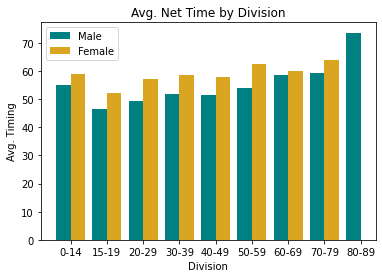

In [28]:
X = df_agg2.index.tolist()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, df_agg2['M'], 0.4, label = 'Male', color = 'teal')
plt.bar(X_axis + 0.2, df_agg2['F'], 0.4, label = 'Female', color = 'goldenrod')
  
plt.xticks(X_axis, X)
plt.xlabel("Division")
plt.ylabel("Avg. Timing")
plt.title("Avg. Net Time by Division")
plt.legend()
plt.savefig('3_output/graphs/q4_2.png', dpi=300, bbox_inches='tight')
plt.show()